In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_training = pd.read_csv('AAPL_train.csv')
dataset_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2014,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,03-01-2014,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,06-01-2014,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,07-01-2014,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,08-01-2014,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [2]:
training_data = dataset_training.iloc[:,1:2].values
training_data

array([[ 79.382858],
       [ 78.980003],
       [ 76.778572],
       ...,
       [155.839996],
       [157.5     ],
       [158.529999]])

특성과 척도 맞추기

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_data_scaled = sc.fit_transform(training_data)
training_data_scaled

array([[0.05400437],
       [0.05148716],
       [0.03773165],
       ...,
       [0.53174205],
       [0.54211448],
       [0.54855037]])

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.05400437],
        [0.05148716],
        [0.03773165],
        ...,
        [0.04582785],
        [0.04002572],
        [0.03850823]],

       [[0.05148716],
        [0.03773165],
        [0.04386406],
        ...,
        [0.04002572],
        [0.03850823],
        [0.03932056]],

       [[0.03773165],
        [0.04386406],
        [0.03894562],
        ...,
        [0.03850823],
        [0.03932056],
        [0.03800839]],

       ...,

       [[0.98231691],
        [0.97794302],
        [0.99543867],
        ...,
        [0.53811549],
        [0.48369155],
        [0.48462887]],

       [[0.97794302],
        [0.99543867],
        [1.        ],
        ...,
        [0.48369155],
        [0.48462887],
        [0.53174205]],

       [[0.99543867],
        [1.        ],
        [0.98237946],
        ...,
        [0.48462887],
        [0.53174205],
        [0.54211448]]])

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
model = Sequential()

In [8]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# 두번째 LSTM 레이어와 드롭아웃 정규화 추가
model.add(LSTM(units=50, return_sequences=True))
# 두번째 LSTM 레이어와 드롭아웃 정규화 추가
model.add(LSTM(units=50, return_sequences=True))
# 두번째 LSTM 레이어와 드롭아웃 정규화 추가
model.add(LSTM(units=50))
# 결과 레이어 추가
model.add(Dense(units=1))

In [9]:
# RNN 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')
# 학습 세이트 RNN 피팅
model.fit(X_train, y_train, epochs=100, batch_size=32)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 10s 8ms/step - loss: 0.0341
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0025
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0023
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0020
Epoch 5/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0022
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0021
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0012
Epoch 11/100
1198/1198 [==============================]

1198/1198 [==============================] - 7s 6ms/step - loss: 2.7301e-04
Epoch 71/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.8570e-04
Epoch 72/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.7360e-04
Epoch 73/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.7933e-04
Epoch 74/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.8679e-04
Epoch 75/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.6019e-04
Epoch 76/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.5485e-04
Epoch 77/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.5287e-04
Epoch 78/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.9210e-04
Epoch 79/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.6195e-04
Epoch 80/100
1198/1198 [==============================] - 7s 6ms/step - loss: 2.6017e-04
Epoch 81/100
1198/1198 [==========

In [14]:
# 테스트 데이터 로딩 및 처리
dataset_testing = pd.read_csv('AAPL_test.csv')
actual_stock_price = dataset_testing.iloc[:, 1:2].values
actual_stock_price

array([[154.889999],
       [143.979996],
       [144.529999],
       [148.699997],
       [149.559998],
       [151.289993],
       [152.5     ],
       [152.880005],
       [150.850006],
       [150.270004],
       [153.080002],
       [154.199997],
       [157.5     ],
       [156.410004],
       [154.149994],
       [154.110001],
       [155.479996],
       [155.789993],
       [156.25    ],
       [163.25    ],
       [166.110001]])

In [15]:
# 데이터를 합친다. 특정 날짜의 주가를 예측하려면 이전 60개의 인스턴스가 필요하니 학습과 테스트 데이터 모두 필요하다.
total_data = pd.concat((dataset_training['Open'], dataset_testing['Open']), axis=0)

In [16]:
# 테스트 데이터 준비를 위해 입력 모양을 바꾸고 척도를 맞춘다.
# 유의할 것은 예측하려는 것이 1월 월간 추세이고, 
# 1월에는 주식 거래일이 21일이기 때문에 테스트 세트를 준비할 때 
# 21일 간격을 유지하기 위해 하한값은 60으로 하고, 상한값은 81로 해야 한다는 점이다. 
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

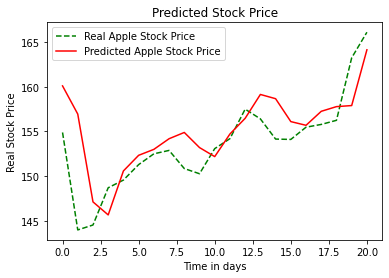

In [17]:
# 결과 시각화
plt.plot(actual_stock_price, color='green', label='Real Apple Stock Price', ls='--')
plt.plot(predicted_stock_price, color='red', label='Predicted Apple Stock Price', ls='-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()